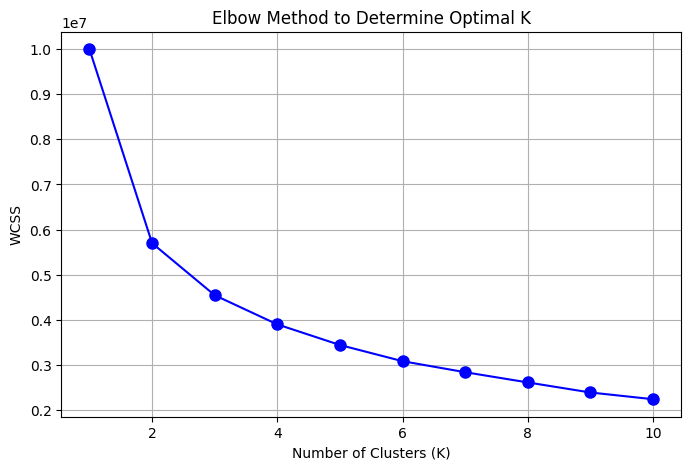

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your data
df = pd.read_csv('/content/synthetic_student_data_final.csv')  # Replace with your actual file

# ✅ Select relevant features for clustering
features = [
    'attendance_rate',
    'avg_daily_study_time',
    'homework_completion_rate',
    'past_score',
    'motivation_level',
    'video_time',
    'quiz_time',
    'homework_time',
    'quiz_accuracy',
    'use_ed_tech'
]

# ✅ Drop rows with missing values (optional, depending on your data)
data = df[features].dropna()

# ✅ Label encode 'use_ed_tech'
le = LabelEncoder()
data['use_ed_tech_encoded'] = le.fit_transform(data['use_ed_tech'])
data = data.drop('use_ed_tech', axis=1)

# ✅ Scale all features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# ✅ Elbow method to find optimal K
wcss = []  # Within-cluster sum of squares

K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# ✅ Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()


In [ ]:
# ✅ Perform final KMeans clustering with K=3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(scaled_data)

# ✅ Add cluster labels back to original data
df['learning_cluster'] = cluster_labels

# ✅ View sample with cluster labels
print(df[['student_id', 'learning_cluster']].head())

# ✅ Optional: Save clustered data
df.to_csv('clustered_students.csv', index=False)
print("Clustering complete and saved to clustered_students.csv")


  student_id  learning_cluster
0     STD001                 2
1     STD002                 0
2     STD003                 1
3     STD004                 1
4     STD005                 1
Clustering complete and saved to clustered_students.csv
